# PROOF OF CONCEPT

In [1]:
import os
import numpy as np
import cv2
import shutil
from PIL import Image
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
from tensorflow.keras import layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import resnet_v2, inception_v3, inception_resnet_v2, efficientnet_v2
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import models
from sklearn.preprocessing import MinMaxScaler

In [2]:
## GLOBAL VARIRABLES
input_shape = (224,224)
channels = 3
epochs = 256
batch_size = 8
preprocessing_function=inception_v3.preprocess_input

## Path Declerations
dataPath = "pngData"
noBgDataPath="noBgData"
classes = os.listdir(dataPath)
path = "data"
trainPath = os.path.join(path,"train")
valPath = os.path.join(path,"val")

## PREPROCESSING

In [3]:
# ## Showing Sample Images WITH BG
rawImagePath = "pngData\9\9P--2-_png.rf.86bd5fc1ea384155983df7316c11eea3.png"
rawImage = cv2.imread(rawImagePath)
# for i in rawImage: 
#     print(i)


In [4]:
# ## Showing Sample Images NO BG
processedImagePath = "noBgData\9\9P--2-_png.rf.86bd5fc1ea384155983df7316c11eea3.png"
processedImage = cv2.imread(processedImagePath)
# for i in processedImage: 
#     print(i)


In [5]:
processedImage.shape

(224, 224, 3)

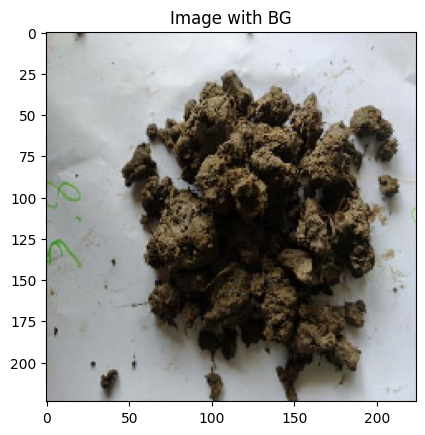

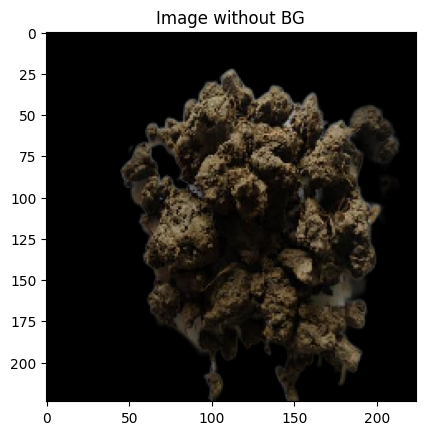

In [6]:
## Showing Sample Images

colorRawImage = cv2.cvtColor(rawImage, cv2.COLOR_BGR2RGB)
plt.imshow(colorRawImage)
plt.title('Image with BG')
plt.show()

colorProcessedImage = cv2.cvtColor(processedImage, cv2.COLOR_BGR2RGB)
plt.imshow(colorProcessedImage)
plt.title('Image without BG')
plt.show()

In [7]:
print("Train Images per Class", len(os.listdir('data//train//7')))
print("Validation Images per Class", len(os.listdir('data//val//7')))

Train Images per Class 303
Validation Images per Class 76


In [8]:
trainGenerator = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    width_shift_range=0.3,
                                    height_shift_range=0.1,
                                    rotation_range=35,
                                    # preprocessing_function=preprocessing_function,
                                    ).flow_from_directory(
                                            directory=trainPath,
                                            target_size=input_shape,
                                            class_mode='categorical',
                                            batch_size=batch_size
                                        )

valGenerator = ImageDataGenerator(rescale = 1./255,
                                #   preprocessing_function=preprocessing_function,
                                  ).flow_from_directory(
                                        directory=valPath,
                                        target_size=input_shape,
                                        class_mode='categorical',
                                        batch_size=batch_size
                                    )

Found 839 images belonging to 4 classes.


Found 210 images belonging to 4 classes.


 ## MODEL TRAINING

In [9]:
# tf_model = inception_v3.InceptionV3(include_top=False,
#                             weights="imagenet",
#                             input_shape= input_shape+(channels,)
#                             )

In [10]:

model = Sequential()
model.add(layers.Input(shape=input_shape+(channels,)))
model.add(layers.Flatten())
# model.add(tf_model)
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))

# model.add(layers.BatchNormalization())

# model.add(layers.Dense(units=2048, kernel_regularizer=L2()))
# model.add(layers.LeakyReLU())
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(units=128, kernel_regularizer=L2()))
# model.add(layers.ReLU())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(units=256, kernel_regularizer=L2()))
# model.add(layers.ReLU())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(units=512, kernel_regularizer=L2()))
# model.add(layers.ReLU())
# model.add(layers.Dropout(0.5))

# model.add(layers.BatchNormalization())

model.add(layers.Dense(units=32, kernel_regularizer=L2()))
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=64, kernel_regularizer=L2()))
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=128, kernel_regularizer=L2()))
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=256, kernel_regularizer=L2()))
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512, kernel_regularizer=L2()))
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1024, kernel_regularizer=L2()))
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1024, kernel_regularizer=L2()))
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=2048, kernel_regularizer=L2()))
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=2048, kernel_regularizer=L2()))
model.add(layers.ReLU())

model.add(layers.Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 32)                4816928   
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [11]:
model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(1e-4),
                metrics=['acc']
                )

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=4, min_lr=1e-7)
es = EarlyStopping(monitor='loss', patience=6)

history = model.fit(trainGenerator, validation_data = valGenerator, 
                        epochs = epochs, callbacks=[reduce_lr, es], 
                        verbose = 1)

Epoch 1/256
105/105 [==============================] - 7s 60ms/step - loss: 52.3674 - acc: 0.3325 - val_loss: 45.6464 - val_acc: 0.3619 - lr: 1.0000e-04
Epoch 2/256
105/105 [==============================] - 6s 58ms/step - loss: 39.5171 - acc: 0.3611 - val_loss: 33.6247 - val_acc: 0.3619 - lr: 1.0000e-04
Epoch 3/256
105/105 [==============================] - 6s 59ms/step - loss: 28.7294 - acc: 0.3611 - val_loss: 24.2089 - val_acc: 0.3619 - lr: 1.0000e-04
Epoch 4/256
105/105 [==============================] - 6s 58ms/step - loss: 20.6225 - acc: 0.3611 - val_loss: 17.3603 - val_acc: 0.3619 - lr: 1.0000e-04
Epoch 5/256
105/105 [==============================] - 6s 57ms/step - loss: 14.8590 - acc: 0.3588 - val_loss: 12.5879 - val_acc: 0.3619 - lr: 1.0000e-04
Epoch 6/256
105/105 [==============================] - 6s 58ms/step - loss: 10.8337 - acc: 0.3611 - val_loss: 9.2499 - val_acc: 0.3619 - lr: 1.0000e-04
Epoch 7/256
105/105 [==============================] - 6s 59ms/step - loss: 8.0332 

### TRAINING RESULTS


In [ ]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

best_epoch = np.argmax(np.array(val_acc))

print("Best Epoch: ", best_epoch)
print("Final Train Loss: {:.4f}".format(train_loss[best_epoch]))
print("Final Validation Loss: {:.4f}".format(val_loss[best_epoch]))
print("Final Train Accuracy: {:.4f}".format(train_acc[best_epoch]))
print("Final Test Accuracy: {:.4f}".format(val_acc[best_epoch]))

Best Epoch:  0
Final Train Loss: 23.6020
Final Validation Loss: 21.1666
Final Train Accuracy: 0.2968
Final Test Accuracy: 0.3619


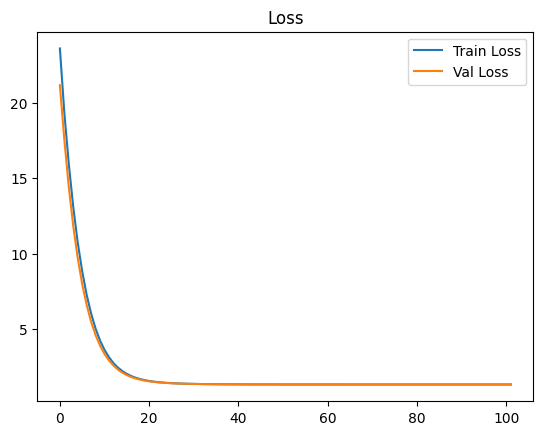

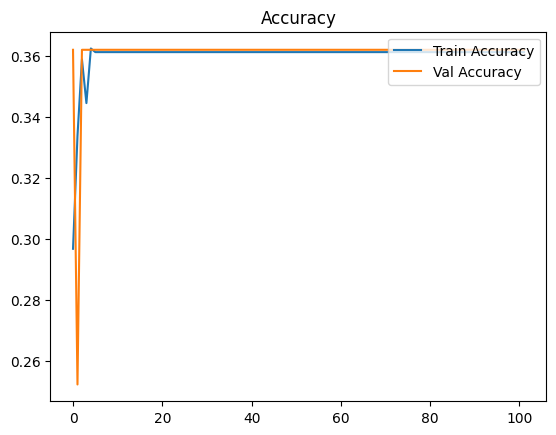

In [ ]:

plt.plot(train_loss)
plt.plot(val_loss)
plt.title("Loss")
plt.legend(["Train Loss", "Val Loss"], loc="upper right")
plt.show()

plt.plot(train_acc)
plt.plot(val_acc)
plt.title("Accuracy")
plt.legend(["Train Accuracy", "Val Accuracy"], loc="upper right")
plt.show()


In [ ]:
# # Pre-processing the image
# img_path= "noBgData//6//43--10-_png.rf.515324d7c28acb83c837f6b6ebcf68f7.png"

# img = image.load_img(img_path, target_size = input_shape)
# img_tensor = image.img_to_array(img)
# img_tensor = preprocessing_function(img_tensor)
# img_tensor = np.expand_dims(img_tensor, axis = 0)
# img_tensor = img_tensor / 255.
  
# # Print image tensor shape
# print(img_tensor.shape)

In [ ]:
# layers = [layer for layer in model.layers[0].layers]
# conv_layers = [layer for layer in layers if "conv" in layer.name]
# sample_layers = [layer for n,layer in enumerate(conv_layers) if n%50 == 0]

# print(layers[:5])

In [ ]:
# def plot_map(layer_activation=0, row=4, col=8):
#     # plot all maps
#     ix = 1
#     for _ in range(col):
#         for _ in range(row):
#             # specify subplot and turn of axis
#             ax = plt.subplot(row, col, ix)
#             ax.set_xticks([])
#             ax.set_yticks([])
#             # plot filter channel in grayscale
#             plt.imshow(layer_activation[0, :, :, ix-1], cmap='viridis')
#             ix += 1
#     # show the figure
#     plt.show()

In [ ]:
# # Outputs of the 8 layers, which include conv2D and max pooling layers
# layer_outputs = [layer.output for layer in conv_layers]
# activation_model = models.Model(inputs = model.layers[0].input, outputs = layer_outputs)
# feature_maps = activation_model.predict(img_tensor)

# ## Showing Feature maps
# plot_map(feature_maps[0])
# plot_map(feature_maps[4])
# plot_map(feature_maps[16])
# plot_map(feature_maps[64])
# # plot_map(feature_maps[200])



## MODEL TESTING

## SAVING